In [769]:
import numpy as np
import matplotlib.pyplot as plt
plt.rcParams.update({
    "text.usetex": True,
    "font.family": "sans-serif",
    "font.sans-serif": ["Helvetica"]})

cm = 1/2.54
DPI=300
fmt_gain = '%r dB'
fmt_phase = '%r °'

class nf(float):
    def __repr__(self):
        s = f'{self:.1f}'
        return f'{self:.0f}' if s[-1] == '0' else s

def rad2deg(rad): return rad*180/np.pi
def deg2rad(deg): return deg*np.pi/180
def nat2dB(g):    return 20*np.log10(g)
def dB2nat(dB):   return 10**(dB/20)
#            z
#     z = -------
#          1 + z
def bo2bf(z):     return z/(1+z)

In [770]:
N=1024
def circle(x,y):
    return 90*4*((x+0.5)**2+y**2)
re_bo=np.linspace(-4,4,N)
im_bo=np.linspace(-4,4,N)
gain_bf=np.zeros((N,N))
phase_bf=np.zeros((N,N))
[Re,Im]=np.meshgrid(re_bo,im_bo)
deg90=circle(Re,Im)
for i in range(N):
    for j in range(N):
        bf=bo2bf(complex(re_bo[i],im_bo[j]))
        gain_bf[j][i]=nat2dB(np.abs(bf))
        #phase_bf[j][i]=rad2deg(np.arctan(bf.imag/bf.real))
        phase_bf[j][i]=rad2deg(np.arcsin(bf.imag/np.abs(bf)))
        #if abs(abs(bf.real)-np.abs(bf))<0.1: rad2deg(np.arctan(bf.imag/bf.real))
        #    phase_bf[j][i]=rad2deg(-np.arctan(bf.imag/bf.real))
        #if (abs(((re_bo[i]+0.5)**2+im_bo[j]**2)-0.5**2)<0.01 ):
        #    phase_bf[j][i]=None

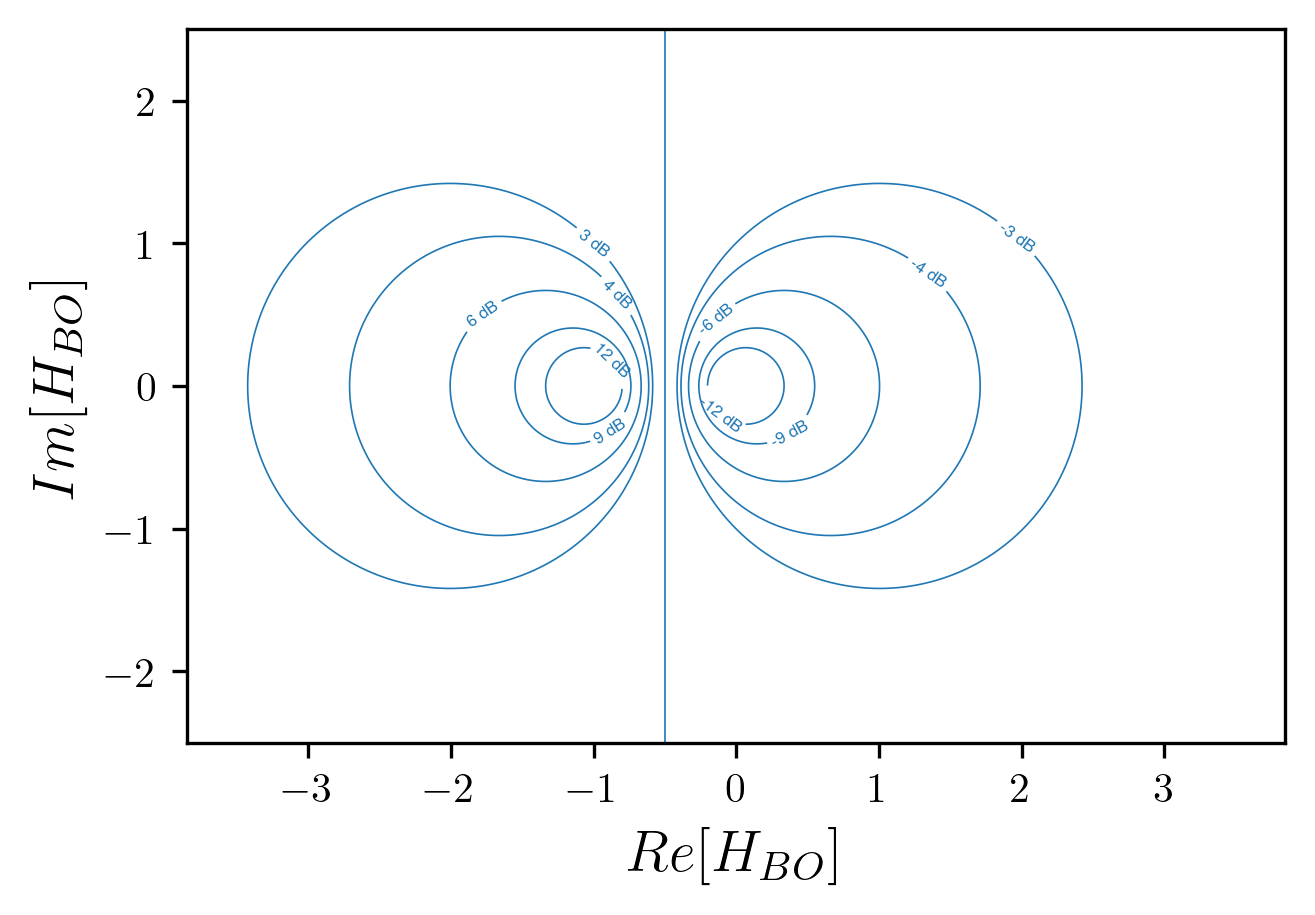

In [771]:
isogain=[-12,-9,-6,-4,-3,0,3,4,6,9,12]
fig, axe = plt.subplots(1, 1, figsize=(12*cm, 8*cm),dpi=DPI)
axe.axis('equal')
axe.set(xlim=(-3,3), ylim=(-2.5,2.5))
axe.xaxis.label.set_text(r'$Re[H_{BO}]$')
axe.xaxis.label.set_size(14) 
axe.yaxis.label.set_text(r'$Im[H_{BO}]$')
axe.yaxis.label.set_size(14) 
isogain=axe.contour(re_bo, im_bo, gain_bf,levels=isogain,colors="tab:blue",linewidths=0.4,linestyles="solid")
isogain.levels = [nf(val) for val in isogain.levels]
axe.clabel(isogain,isogain.levels,inline=True, inline_spacing=10,fontsize=4,fmt=fmt_gain,colors='tab:blue')
plt.show()

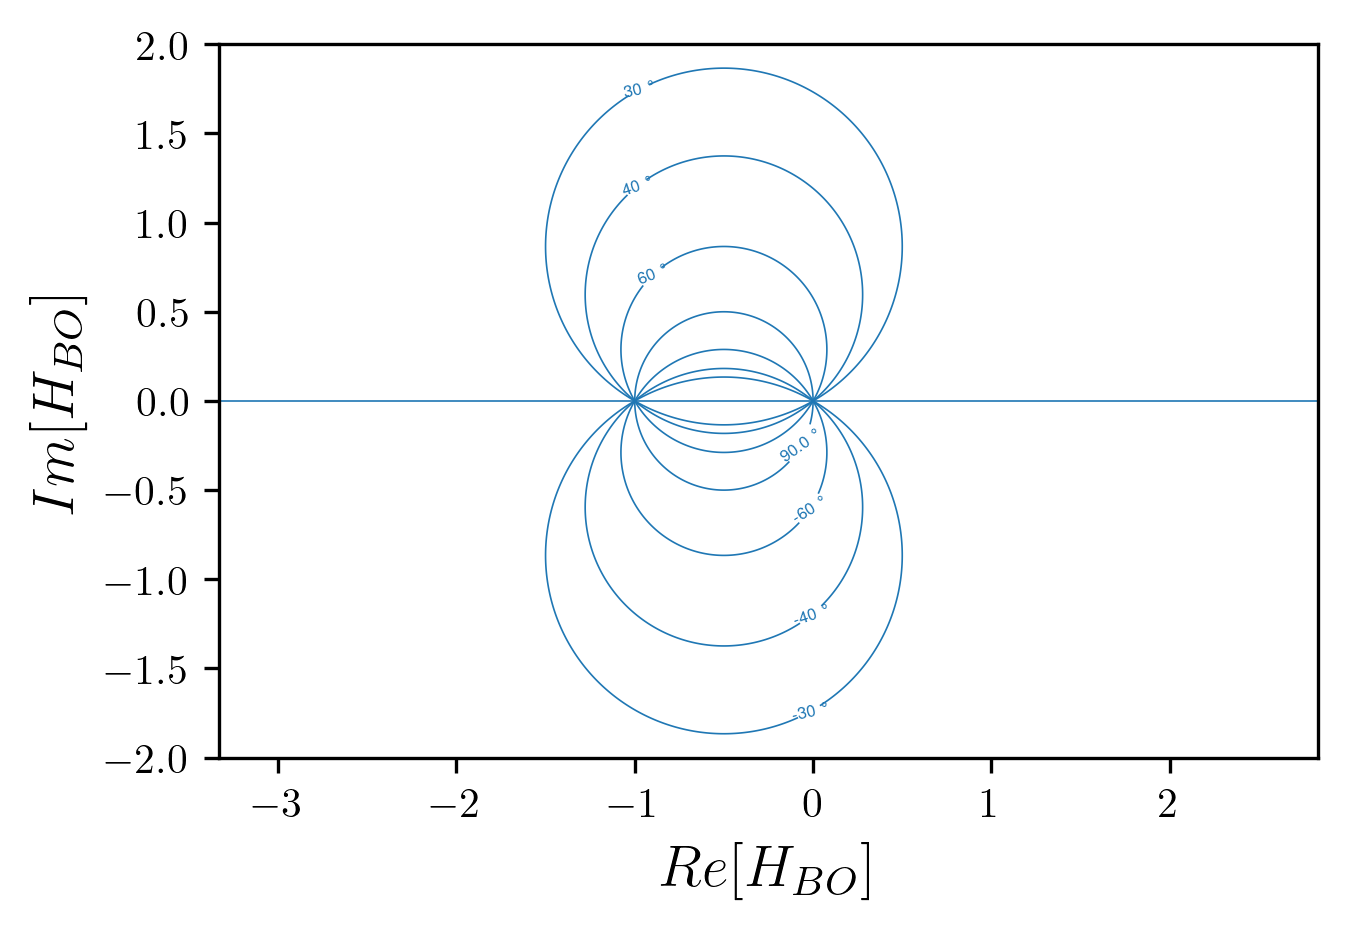

In [772]:
isophases=[-60,-40,-30,0,30,40,60]
#isophases=[-60,-45,-35,-25,0,25,35,45,60]
#isophases=[-90.0]
fig, axe = plt.subplots(1, 1, figsize=(12*cm, 8*cm),dpi=DPI)
axe.axis('equal')
axe.set(xlim=(-1.5,1), ylim=(-2,2))
axe.xaxis.label.set_text(r'$Re[H_{BO}]$')
axe.xaxis.label.set_size(14) 
axe.yaxis.label.set_text(r'$Im[H_{BO}]$')
axe.yaxis.label.set_size(14) 
isophase=axe.contour(re_bo, im_bo, phase_bf,isophases,colors="tab:blue",linewidths=0.4,linestyles="solid")
iso90=axe.contour(re_bo, im_bo, deg90,[90],colors="tab:blue",linewidths=0.4,linestyles="solid")
isophase.levels = [nf(val) for val in isophase.levels]
isophase_loc=[(0,-2),(0,-1.3),(0,-0.7),(-1,2),(-1,1.3),(-0.9,0.7)]
iso90_loc=[(0,-0.5)]
axe.clabel(isophase, isophase.levels,inline=True,inline_spacing=10,fontsize=4,fmt=fmt_phase,colors='tab:blue',manual=isophase_loc)
axe.clabel(iso90, iso90.levels,inline=True,inline_spacing=10,fontsize=4,fmt=fmt_phase,colors='tab:blue',manual=iso90_loc)
plt.show()

In [773]:
N=1024
phase_bo=np.linspace(-360.0,0.0,N)
gain_bo=np.linspace(-35,35,N)
gain_bf=np.zeros((N,N))
phase_bf=np.zeros((N,N))
for i in range(N):
    for j in range(N):
        g=dB2nat(gain_bo[j])
        p=deg2rad(phase_bo[i])
        h=g*np.exp(1j*p)
        bf=bo2bf(complex(h.real,h.imag))
        gain_bf[j][i]=nat2dB(np.abs(bf))
        phase_bf[j][i]=rad2deg(np.arctan2(bf.imag,bf.real))

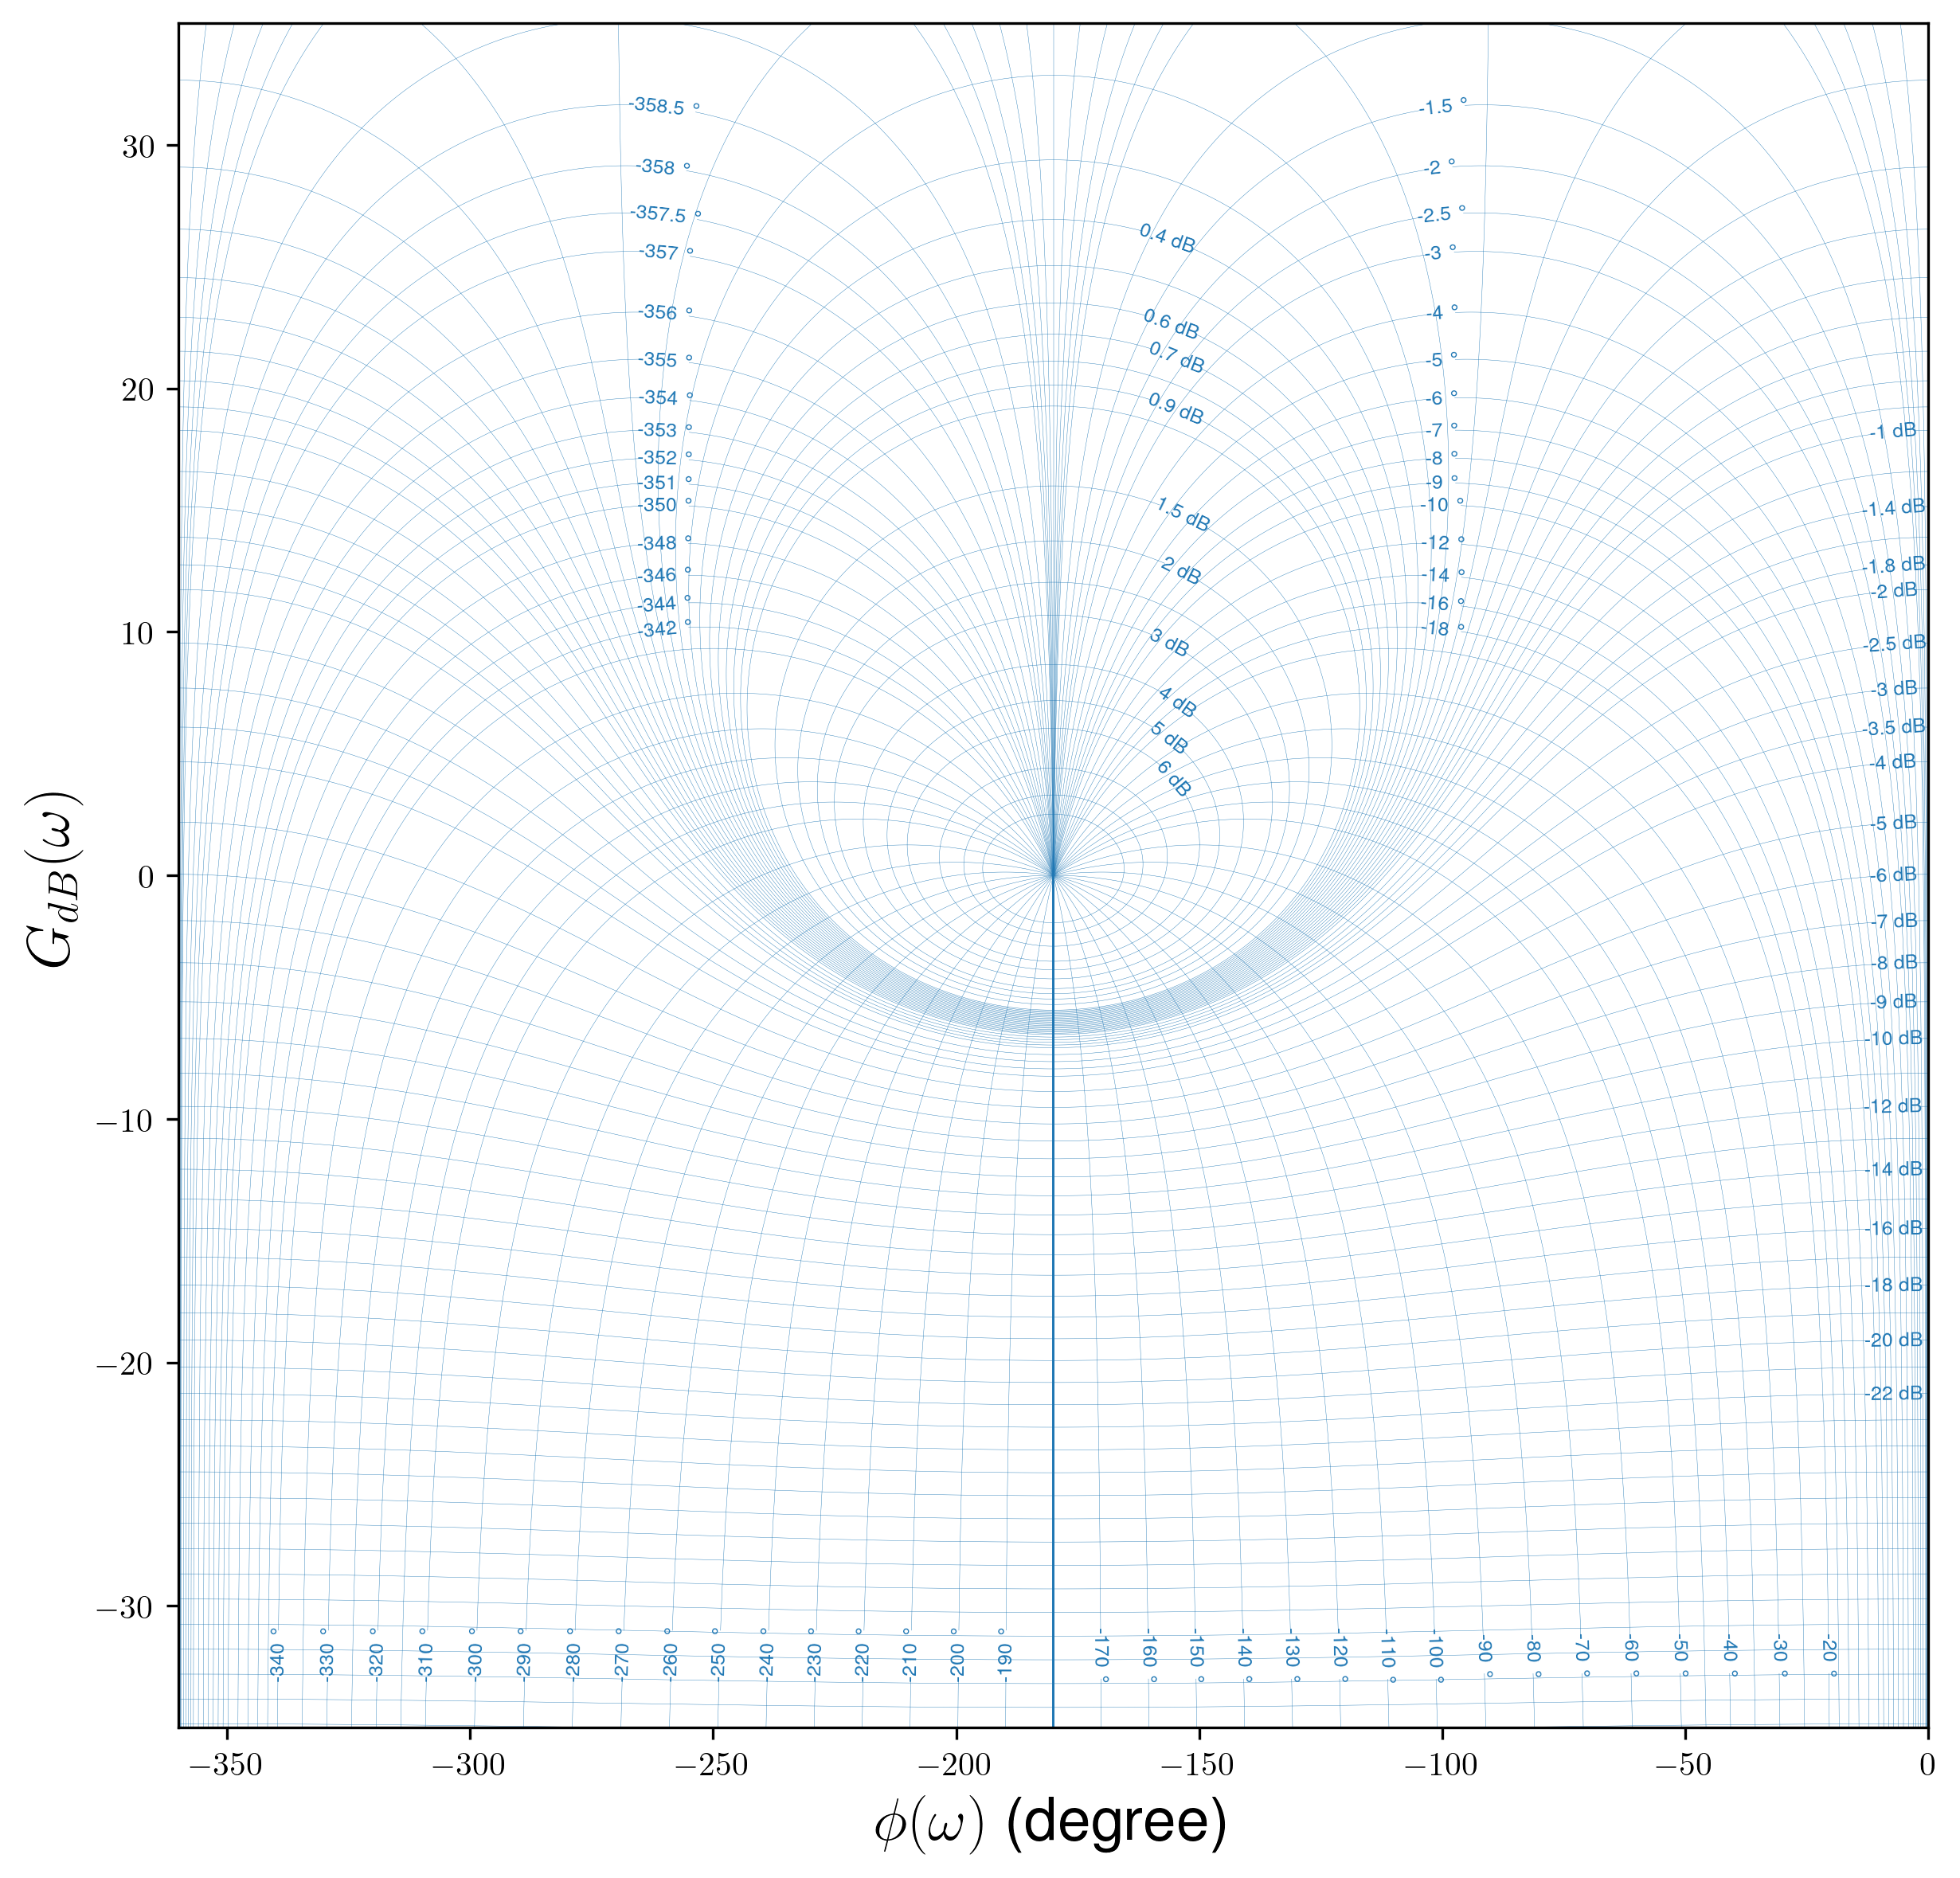

In [828]:
isomodules=[x for x in np.arange(-35,-3)]
isomodules+=[x for x in np.arange(-3.5,-1.5,0.5)]
isomodules+=[x for x in np.arange(-1.8,-0.8,0.2)]
isomodules+=[x for x in np.arange(-0.9,1.1,0.1)]
isomodules+=[x for x in np.arange(1.5,3.5,0.5)]
isomodules+=[4,5,6,8,10,12]
isophases=[x for x in np.arange(-210,-40,10)]
isophases+=[x for x in np.arange(-45,-15,5)]
isophases+=[x for x in np.arange(-18,-8,2)]
isophases+=[x for x in np.arange(-9,-2,1)]
isophases+=[x for x in np.arange(-2.5,0,0.5)]
isophases+=[x for x in np.arange(-0.4,0,0.1)]
isophases+=[x for x in np.arange(0,0.5,0.1)]
isophases+=[x for x in np.arange(0.5,3,0.5)]
isophases+=[x for x in np.arange(3,11,1)]
isophases+=[x for x in np.arange(12,22,2)]
isophases+=[x for x in np.arange(25,55,5)]
isophases+=[x for x in np.arange(60,240,10)]

fig, axe = plt.subplots(1, 1, figsize=(24*cm, 24*cm),dpi=DPI)
axe.set(xlim=(-360,0.0), ylim=(-35,35))
axe.xaxis.label.set_text(r'$\phi(\omega)$ (degree)')
axe.xaxis.label.set_size(18) 
axe.yaxis.label.set_text(r'$G_{dB}(\omega)$')
axe.yaxis.label.set_size(18) 
isogain=axe.contour(phase_bo, gain_bo,gain_bf,levels=isomodules,linewidths=0.1,colors="tab:blue",linestyles="solid")
isophase=axe.contour(phase_bo, gain_bo,phase_bf,levels=isophases,linewidths=0.1,colors="tab:blue",linestyles="solid")
isogain.levels = [nf(val) for val in isogain.levels] 
isophase.levels = [nf(val) if val<0 else nf(-360+val) for val in isophase.levels]
isogain_loc = [(-7,-21),(-7,-19),(-7,-17),
            (-7,-15),(-7,-12),(-7,-10),
            (-7,-7),(-7,-5),(-7,-3),(-7,-1),
            (-7,0),(-7,2),(-7,4),(-7,6),
            (-7,8),(-7,10),(-7,12),(-7,13),(-7,15),(-7,18),
            (-155,4),(-155,6),(-155,7),(-155,10),
            (-155,12),(-155,14),(-155,19),(-155,21),(-155,23),(-155,27)]
isophase_loc=[(-260,10),(-260,11),(-260,12),(-260,13),(-260,15),(-260,16),(-260,17),(-260,18),(-260,19),
              (-260,21),(-260,23),(-260,25),(-260,27),(-260,30),(-260,32),
              (-100,10),(-100,11),(-100,12),(-100,13),(-100,15),(-100,16),(-100,17),(-100,18),(-100,19),
              (-100,21),(-100,23),(-100,25),(-100,27),(-100,28),(-100,32),
              (-20,-32),(-30,-32),(-40,-32),(-50,-32),
              (-60,-32),(-70,-32),(-80,-32),(-90,-32),
             (-100,-32),(-110,-32),(-120,-32),(-130,-32),
             (-140,-32),(-150,-32),(-160,-32),(-170,-32),
              (-190,-32),(-200,-32),(-210,-32),(-220,-32),
              (-230,-32),(-240,-32),(-250,-32),(-260,-32),
              (-270,-32),(-280,-32),(-290,-32),(-300,-32),
              (-310,-32),(-320,-32),(-330,-32),(-340,-32)]
axe.clabel(isophase, isophase.levels,inline=True,inline_spacing=-3, fontsize=6,fmt=fmt_phase,manual=isophase_loc)
axe.clabel(isogain, isogain.levels,inline=True,inline_spacing=-3, fontsize=6,fmt=fmt_gain,manual=isogain_loc)
plt.show()

# Exemples d'utilisations

In [831]:
import sys
sys.path.insert(0, '/home/filipe/enseignement/sma_auto/notebook/ftransfert_module/')
from ftransfert import Ftransfert